## Spam Detection

In [1]:
# import necessary libraries to explore the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# import python scripts we created to help with feature engineering
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.feature_importance_plot import feature_importance_plot
from src.learning_curve_plot import learning_curve_plot

import warnings 
warnings.filterwarnings('ignore')

In [2]:
! pip3 install xgboost


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


## Read and Explore the Data

In [3]:
# read the data

heart_disease_data = pd.read_csv('../../05Lecture/data/cleaned/sms_spam_data_preprocessed.csv')

# preview the data
heart_disease_data.head()

,text_length,encoded_label,aa,aah,aaooright,aathi,ab,abbey,abdoman,abeg,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,155,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# check the shape of the data

heart_disease_data.shape

# we have 294 rows of data, and 14 potential features.
# small data set

(5043, 6578)

In [5]:
# check the summary information of the data

heart_disease_data.info()

# do we have any categorical data that needs processing?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Columns: 6578 entries, text_length to zyada
dtypes: float64(6576), int64(2)
memory usage: 253.1 MB


In [6]:
# check the distribution of the target

heart_disease_data.encoded_label.value_counts(dropna = True, normalize = True)

# The data is slightly imbalanced, with roughly 36% of patients having had a heart disease

encoded_label
0    0.870712
1    0.129288
Name: proportion, dtype: float64

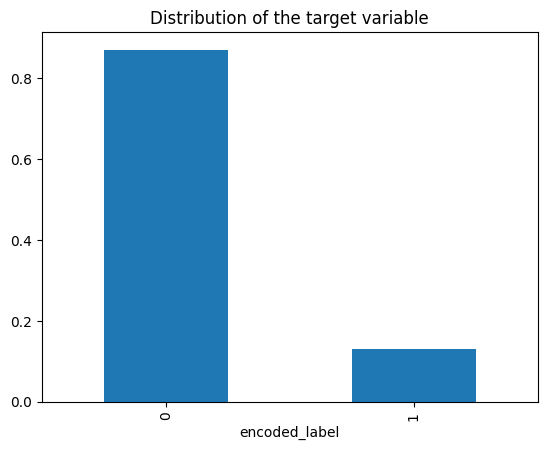

In [7]:
# visualise the distribution of the target

heart_disease_data.encoded_label.value_counts(normalize = True).plot(kind = 'bar')
plt.title("Distribution of the target variable");

# This is an example of an imbalanced dataset

In [8]:
# last thing we need to do before building our ML model is defining the target and features

target = heart_disease_data["encoded_label"]
features = heart_disease_data.drop(["encoded_label"], axis = 1)


### Building the ML Model 

#### Decision Tree

In [9]:
# We do not have to use scaled data for decision tree based algorithms
# so start by splitting data into train and test sets again

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target,
                                                test_size = 0.2, 
                                                random_state = 8888)

In [10]:
# print the shape of the training data

print("Training Data")
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)

Training Data
Shape of X_train (4034, 6577)
Shape of y_train (4034,)


In [11]:
# print the shape of the test data 

print("Test Data")
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Test Data
Shape of X_test (1009, 6577)
Shape of y_test (1009,)


In [12]:
# Import and Fit the Decision Tree Model

clf_tree = DecisionTreeClassifier()

clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
# Make predictions on unseen data

y_pred_dt = clf_tree.predict(X_test) 
y_pred_dt

array([0, 0, 0, ..., 0, 0, 1])

In [14]:
print("first five predicted values:", y_pred_dt[0:5])
print("first five actual values:", list(y_test[0:5]))


first five predicted values: [0 0 0 0 1]
first five actual values: [0, 0, 0, 0, 1]


In [15]:
print("accuracy:", round(accuracy_score(y_test, y_pred_dt), 2))
print("recall:", round(recall_score(y_test, y_pred_dt), 2))
print("precision:", round(precision_score(y_test, y_pred_dt), 2))
print("f1-score:", round(f1_score(y_test, y_pred_dt), 2))


accuracy: 0.96
recall: 0.85
precision: 0.82
f1-score: 0.83


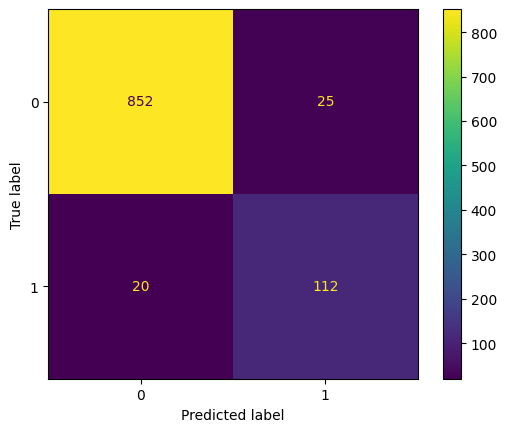

In [16]:
# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_tree.classes_)

disp.plot()
plt.show()

In [17]:
# print classification report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       877
           1       0.82      0.85      0.83       132

    accuracy                           0.96      1009
   macro avg       0.90      0.91      0.90      1009
weighted avg       0.96      0.96      0.96      1009



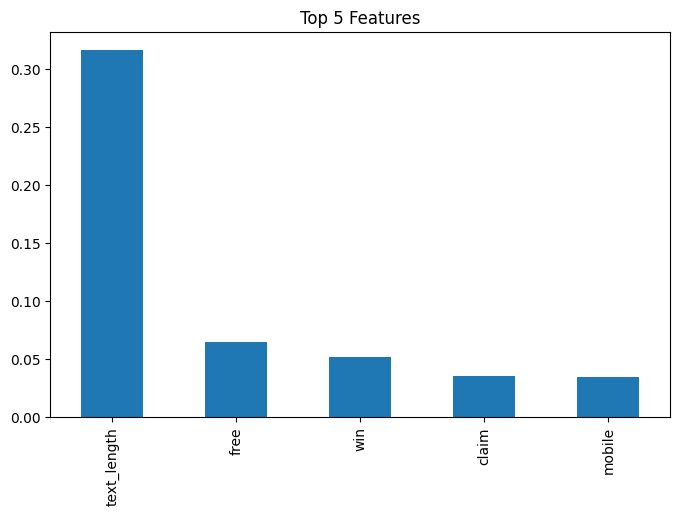

In [18]:
# Plot the feature importance

feature_importance_plot(clf_tree, X_train, n = 5)

# slope is the most important feature

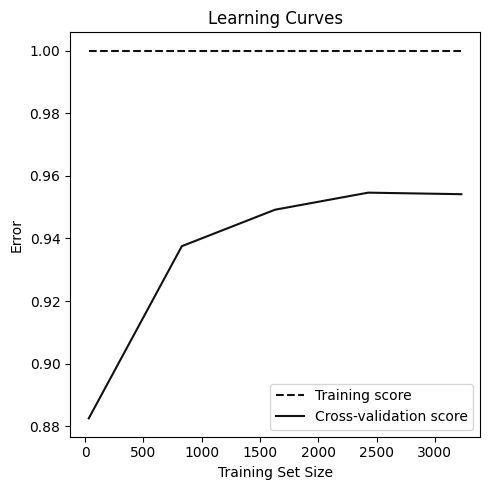

In [45]:
# Plot the learning curve

learning_curve_plot(clf_tree, X_train, y_train, scoring = 'accuracy')

#### Random Forest

In [20]:
# Import and Fit the Random Forest Model

clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# Make predictions on unseen data

y_pred_rf = clf_rf.predict(X_test) 
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
print("first five predicted values:", y_pred_rf[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [0 0 0 0 1]
first five actual values: [0, 0, 0, 0, 1]


In [23]:
# Make predictions on seen data

y_pred_train_rf = clf_rf.predict(X_train) 
y_pred_train_rf

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
print("accuracy:", round(accuracy_score(y_train, y_pred_train_rf), 2))
print("recall:", round(recall_score(y_train, y_pred_train_rf), 2))
print("precision:", round(precision_score(y_train, y_pred_train_rf), 2))
print("f1-score:", round(f1_score(y_train, y_pred_train_rf), 2))

accuracy: 1.0
recall: 1.0
precision: 1.0
f1-score: 1.0


In [25]:
print("accuracy:", round(accuracy_score(y_test, y_pred_rf), 2))
print("recall:", round(recall_score(y_test, y_pred_rf), 2))
print("precision:", round(precision_score(y_test, y_pred_rf), 2))
print("f1-score:", round(f1_score(y_test, y_pred_rf), 2))

accuracy: 0.98
recall: 0.83
precision: 0.99
f1-score: 0.91


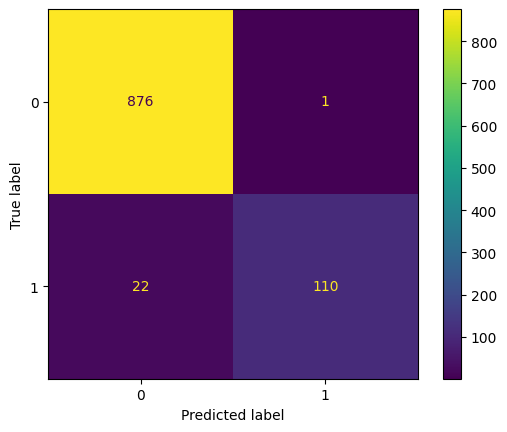

In [26]:
# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot()
plt.show()

In [27]:
# print classification report

print(classification_report(y_test, y_pred_rf))

# slight improvement, drop in misclassifying patients without heart disease


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       877
           1       0.99      0.83      0.91       132

    accuracy                           0.98      1009
   macro avg       0.98      0.92      0.95      1009
weighted avg       0.98      0.98      0.98      1009



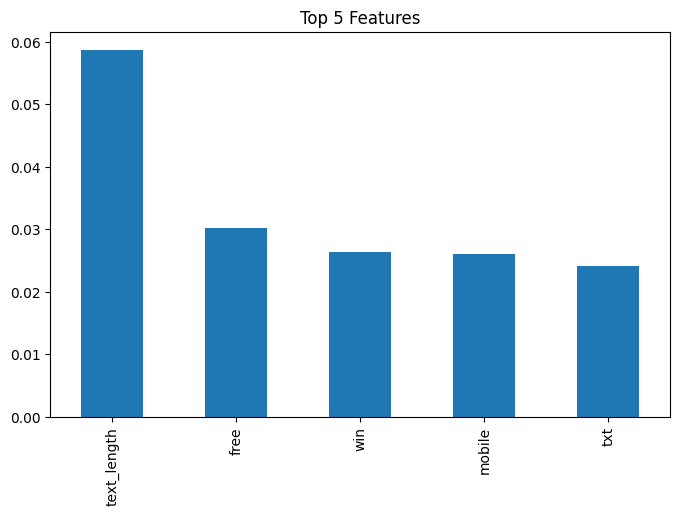

In [28]:
# feature importance plot

feature_importance_plot(clf_rf, X_train, n = 5) 

# unlike decision tree, where slope was the dominant feature , 
# seeing signs of more features being used to split the nodes

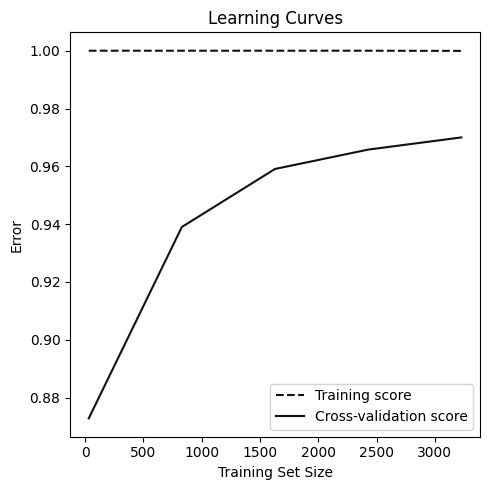

In [29]:
# Plot the learning curve

learning_curve_plot(clf_rf, X_train, y_train, scoring = 'accuracy')

#### XGBoost

In [30]:
# Import and Fit the XGBoost Model

clf_xgb = XGBClassifier()
clf_xgb = XGBClassifier().fit(X_train, y_train)

In [31]:
# Make predictions on unseen data

y_pred_xgb = clf_xgb.predict(X_test) 
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
print("first five predicted values:", y_pred_xgb[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [0 0 0 0 1]
first five actual values: [0, 0, 0, 0, 1]


In [33]:
# Make predictions on seen data

y_pred_train_xgb = clf_xgb.predict(X_train) 
y_pred_train_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
print("accuracy:", round(accuracy_score(y_train, y_pred_train_xgb), 2))
print("recall:", round(recall_score(y_train, y_pred_train_xgb), 2))
print("precision:", round(precision_score(y_train, y_pred_train_xgb), 2))
print("f1-score:", round(f1_score(y_train, y_pred_train_xgb), 2))

accuracy: 0.99
recall: 0.92
precision: 1.0
f1-score: 0.96


In [35]:
print("accuracy:", round(accuracy_score(y_test, y_pred_xgb), 2))
print("recall:", round(recall_score(y_test, y_pred_xgb), 2))
print("precision:", round(precision_score(y_test, y_pred_xgb), 2))
print("f1-score:", round(f1_score(y_test, y_pred_xgb), 2))

accuracy: 0.97
recall: 0.84
precision: 0.92
f1-score: 0.88


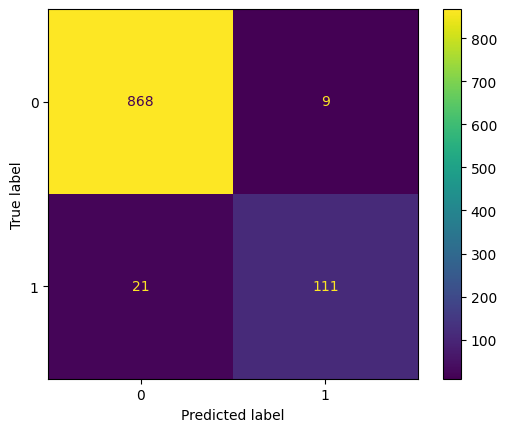

In [36]:
# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgb.classes_)

disp.plot()
plt.show()

In [37]:
# print classification report

print(classification_report(y_test, y_pred_xgb))

# outperforms the random forest and decision tree model, with f1-score of 71% 
# and also higher precision and recalls when predicting patients without heart disease.


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       877
           1       0.93      0.84      0.88       132

    accuracy                           0.97      1009
   macro avg       0.95      0.92      0.93      1009
weighted avg       0.97      0.97      0.97      1009



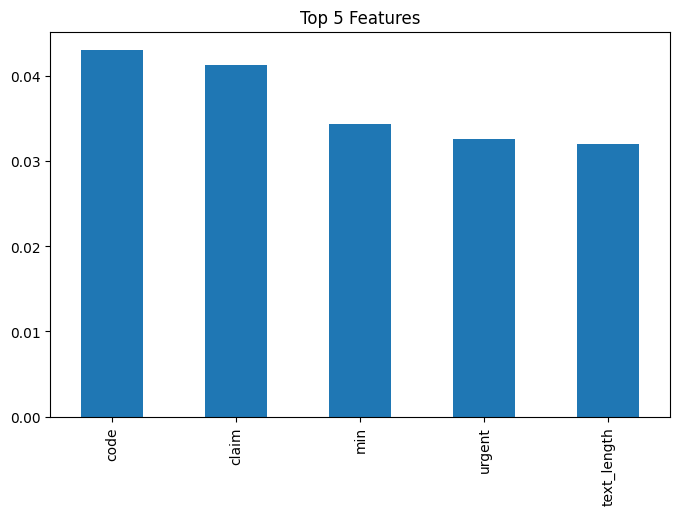

In [38]:
# feature importance plot

feature_importance_plot(clf_xgb, X_train, n = 5) 

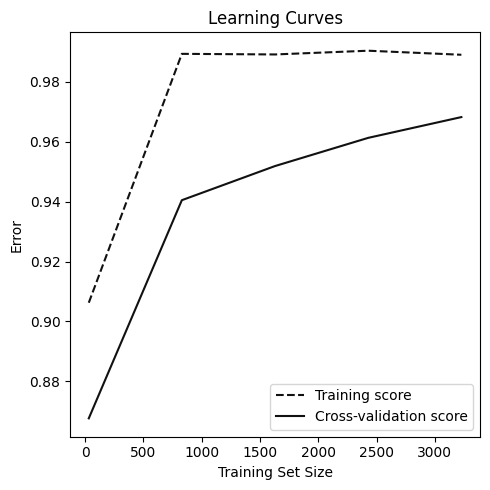

In [39]:
# Plot the learning curve

learning_curve_plot(clf_xgb, X_train, y_train, scoring = 'accuracy')

### Model Selection

In [40]:
# This code is just for demonstration, and to compare the metrics of the models

pd.DataFrame({"Model Name": ['Decision Tree', 'Random Forest', 'XGBoost'],
              "Accuracy": [
                           round(accuracy_score(y_test, y_pred_dt), 2),
                           round(accuracy_score(y_test, y_pred_rf), 2),
                           round(accuracy_score(y_test, y_pred_xgb), 2)
                          ],
              "Recall": [ 
                        round(recall_score(y_test, y_pred_dt), 2),
                        round(recall_score(y_test, y_pred_rf), 2),
                        round(recall_score(y_test, y_pred_xgb), 2)],
              "Precision": [
                           round(precision_score(y_test, y_pred_dt), 2),
                           round(precision_score(y_test, y_pred_rf), 2),
                           round(precision_score(y_test, y_pred_xgb), 2)],
              "F1-Score": [ 
                           round(f1_score(y_test, y_pred_dt), 2),
                           round(f1_score(y_test, y_pred_rf), 2),
                           round(f1_score(y_test, y_pred_xgb), 2)],
             })

# Question - which Model has a highest accuracy, recall, precision and f1-score?

,Model Name,Accuracy,Recall,Precision,F1-Score
0,Decision Tree,0.96,0.85,0.82,0.83
1,Random Forest,0.98,0.83,0.99,0.91
2,XGBoost,0.97,0.84,0.92,0.88


- The table above summarise different evaluation metrics for the algorithms we used to train our data.  
- XGBoost is performing the best, especially compared to the Decision Tree and Random Forest algorithms and has the highest overall accuracy, recall and f1-score.
- However, the Logistic Regression Model has the highest precision, so if we wanted to optimise on precision we may want to consider using that model. 
- When unsure if we want to optimise on precision and recall, can also look at the f1-score and since XGBoost has the highest f1-score we would use this model to make predictions on future patients.
- In terms of improvements, the models are all overfitting and could be reduced with more training data.

### Storing the trained model

In [46]:
# code to store the best model

import joblib

joblib.dump(clf_xgb, '../model/best_model.joblib')

['../model/best_model.joblib']

In [47]:
# reminder - list of features used to train model

list(features)

['text_length',
 'aa',
 'aah',
 'aaooright',
 'aathi',
 'ab',
 'abbey',
 'abdoman',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'abnormally',
 'abouta',
 'abroad',
 'absence',
 'absolutely',
 'absolutly',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abuse',
 'abuser',
 'ac',
 'acc',
 'accenture',
 'accept',
 'access',
 'accessible',
 'accidant',
 'accident',
 'accidentally',
 'accommodation',
 'accommodationvouchers',
 'accomodate',
 'accordin',
 'accordingly',
 'accordinglyor',
 'account',
 'accumulation',
 'achan',
 'ache',
 'achieve',
 'acid',
 'acknowledgement',
 'aclpm',
 'acnt',
 'acoentry',
 'act',
 'actin',
 'action',
 'activ',
 'activate',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addict',
 'addie',
 'address',
 'addressull',
 'adewale',
 'adi',
 'adjustable',
 'admin',
 'administrator',
 'admirer',
 'admission',
 'admit',
 'adore',
 'adp',
 'adress',
 'adrian',
 'adsense',
 'adult',
 'adva

In [48]:
# distribution of features
features.describe()

,text_length,aa,aah,aaooright,aathi,ab,abbey,abdoman,abeg,abel,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,...,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,74.830855,0.000071,0.000300,0.000174,0.000295,0.000059,0.000109,0.000066,0.000098,0.000060,...,0.000092,0.000058,0.000071,0.000066,0.000130,0.000086,0.000062,0.000065,0.000064,0.000033
std,46.691419,0.005024,0.012523,0.012368,0.014970,0.004224,0.007719,0.004656,0.006951,0.004276,...,0.006507,0.004086,0.005031,0.004709,0.006549,0.006126,0.004419,0.004635,0.004540,0.002354
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,198.000000,0.356796,0.590567,0.878332,0.858850,0.299977,0.548149,0.330665,0.493627,0.303648,...,0.462112,0.290193,0.357253,0.334385,0.359273,0.435025,0.313779,0.329158,0.322404,0.167192


In [49]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Columns: 6577 entries, text_length to zyada
dtypes: float64(6576), int64(1)
memory usage: 253.1 MB
